In [109]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

## Common Russian Data

In [110]:
brent = pd.read_csv('Данные/Brent.csv')
brent = brent[brent['Date'] >= '2014-01-15']
brent.rename(columns={'Price': 'Brent'}, inplace=True)
brent['Date'] = pd.date_range(start='2014-01-01', end='2025-01-01', freq='M')
brent.reset_index(drop=True, inplace=True)
brent.head()

,Date,Brent
0,2014-01-31,108.12
1,2014-02-28,108.90
2,2014-03-31,107.48
3,2014-04-30,107.76
4,2014-05-31,109.54


In [111]:
gosdolg = pd.read_excel('Данные/gosdolg.xls')
gosdolg['Date'] = pd.date_range(start='2014-01-01', end='2025-01-01', freq='M')
gosdolg.head()

,Date,gov_debt
0,2014-01-31,5722.24
1,2014-02-28,5733.57
2,2014-03-31,5754.95
3,2014-04-30,5707.24
4,2014-05-31,5714.97


In [112]:
infl_exp = pd.read_excel('Данные/Infl_expectation.xlsx')
infl_exp.columns = ['Date', 'Infl_exp']
infl_exp['Date'] = pd.date_range(start='2014-01-01', end='2025-02-01', freq='M')
infl_exp.head()

,Date,Infl_exp
0,2014-01-31,13.04
1,2014-02-28,11.80
2,2014-03-31,11.52
3,2014-04-30,12.67
4,2014-05-31,11.72


In [113]:
m2 = pd.read_excel('Данные/M2.xlsx')
m2.columns = ['Date', 'M2']
m2 = m2[m2['Date'] >= '2014-01-01']
m2['Date'] = pd.date_range(start='2014-01-01', end='2025-03-01', freq='M')
m2.reset_index(drop=True, inplace=True)
m2.head()

,Date,M2
0,2014-01-31,31155.60
1,2014-02-28,29861.20
2,2014-03-31,30169.00
3,2014-04-30,29519.30
4,2014-05-31,29879.00


In [114]:
miacr = pd.read_excel('Данные/miacr.xlsx')
miacr.columns = ['Date', 'MIACR']
miacr.set_index('Date', inplace=True)
miacr = miacr.resample('M').mean()
miacr.index = miacr.index.to_period('M').to_timestamp('M') - pd.offsets.MonthBegin(1)
miacr.reset_index(inplace=True)
miacr['Date'] = pd.date_range(start='2014-01-01', end='2025-04-01', freq='M')
miacr.head()

,Date,MIACR
0,2014-01-31,6.06
1,2014-02-28,5.99
2,2014-03-31,7.85
3,2014-04-30,7.87
4,2014-05-31,8.21


In [115]:
obligates = pd.read_excel('Данные/доходность ОФЗ.xlsx')
obligates['Date'] = pd.bdate_range('2014-01-06', '2024-10-08')
obligates['obligates'].astype('float')
obligates['year'] = obligates['Date'].dt.year
obligates['month'] = obligates['Date'].dt.month
ofz = obligates.groupby(['year', 'month'], as_index=False)[['obligates']].mean()
ofz['Date'] = pd.date_range('2014-01-01', '2024-11-01', freq='M')
ofz = ofz[['Date', 'obligates']]
ofz

,Date,obligates
0,2014-01-31,6.20
1,2014-02-28,6.39
2,2014-03-31,7.40
3,2014-04-30,7.50
4,2014-05-31,7.95
...,...,...
125,2024-06-30,21.45
126,2024-07-31,21.72
127,2024-08-31,18.67
128,2024-09-30,18.85


In [116]:
unemp = pd.read_excel('Данные/unemployment.xlsx', sheet_name='2')
unemp = pd.DataFrame(np.repeat(unemp.values, repeats=12,axis=0), columns=['Date', 'unemployment'])
unemp['Date'] = pd.date_range(start='2014-01-01', end='2024-01-01', freq='M')
unemp

,Date,unemployment
0,2014-01-31,6.80
1,2014-02-28,6.80
2,2014-03-31,6.80
3,2014-04-30,6.80
4,2014-05-31,6.80
...,...,...
115,2023-08-31,4.21
116,2023-09-30,4.21
117,2023-10-31,4.21
118,2023-11-30,4.21


## Regional Data

In [117]:
fm_names = ['Ожидания изменение цен на готов', 'Ожидания изменение спроса на пр',
            ' Изменение спроса на продукцию', 'Изменение издержек производства', 'Изменение объемов производства']

fm_heading = ['price_exp', 'demand_exp', 'changes_demand', 'changes_costs', 'changes_volume']

for i in range(len(fm_names)):
    df_head = f'fm_{fm_heading[i]}'
    globals()[df_head] = pd.read_excel('Данные/МП.xlsx', sheet_name=fm_names[i])
    cols = list(map(str.strip, globals()[df_head].columns))
    globals()[df_head].columns = cols
    globals()[df_head]['Date'] = pd.date_range('2014-01-01', '2023-11-01', freq='M')
    date = globals()[df_head].pop('Date')
    globals()[df_head].insert(0, 'Date', date)
    globals()[df_head].drop(['date'], axis=1, inplace=True)
    globals()[df_head].reset_index(drop=True, inplace=True)
    globals()[df_head] = globals()[df_head].reindex(sorted(globals()[df_head].columns), axis=1)
    globals()[df_head].columns = globals()[df_head].columns.str.replace(' ', '_')


fm_demand_exp.head()

,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Тюменская_область,Удмуртская_Республика,Ульяновская_область,Хабаровский_край,Челябинская_область,Чувашская_Республика,Чукотский_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-31,7.17,11.48,22.22,22.22,22.44,35.71,19.55,14.00,14.50,...,17.36,24.70,23.50,12.92,23.36,23.80,34.92,16.79,14.50,17.50
1,2014-02-28,12.92,8.20,30.86,30.86,32.00,33.04,17.51,18.75,7.30,...,15.57,25.70,17.10,18.31,26.05,24.20,28.57,22.73,8.80,14.40
2,2014-03-31,13.82,8.80,28.40,28.40,24.34,25.45,22.33,21.62,13.80,...,12.30,9.00,20.70,17.42,34.42,19.10,23.44,17.29,10.30,18.50
3,2014-04-30,15.47,9.09,28.40,28.40,23.33,17.27,14.81,20.75,12.10,...,22.76,13.60,11.40,16.57,32.09,23.60,15.87,20.74,7.00,16.40
4,2014-05-31,17.13,8.06,24.69,24.69,25.68,22.94,11.27,26.11,10.10,...,4.10,11.50,15.50,14.80,28.97,24.50,41.54,17.04,10.50,15.80


In [118]:
inflation = pd.read_excel('Данные/бипц1.xls', sheet_name='1')
cols = list(map(str.strip, inflation.columns))
inflation.columns = cols
inflation.fillna(method='ffill')
inflation['Date'] = pd.date_range(start='2014-01-01', end='2025-02-01', freq='M')
date = inflation.pop('Date')
inflation.insert(0, 'Date', date)
inflation.reset_index(drop=True, inplace=True)
inflation = inflation.reindex(sorted(inflation.columns), axis=1)
inflation.columns = inflation.columns.str.replace(' ', '_')
inflation.head()

/var/folders/r7/t8m59hld1hb_kbs6vxdb07vm0000gn/T/ipykernel_64706/778820217.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  inflation.fillna(method='ffill')


,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Хабаровский_край,Ханты-Мансийский_автономный_округ,Челябинская_область,Чеченская_Республика,Чувашская_Республика,Чукотский_автономный_округ,Ямало-Ненецкий_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-31,100.38,100.50,100.44,100.47,100.56,100.44,100.42,100.20,100.29,...,100.18,100.21,100.50,99.84,100.65,100.26,100.37,100.59,100.55,100.52
1,2014-02-28,100.50,100.34,100.61,100.18,100.13,100.35,100.51,100.73,100.46,...,100.60,100.55,100.35,100.15,100.62,100.81,100.61,100.48,100.55,100.56
2,2014-03-31,101.38,100.64,100.78,100.80,100.21,100.97,101.15,100.93,100.68,...,100.66,100.50,100.66,100.44,100.38,100.97,100.49,101.16,101.06,100.82
3,2014-04-30,100.62,101.02,100.74,100.93,101.10,100.97,101.24,100.89,100.70,...,100.68,100.58,100.63,100.49,100.93,100.20,100.45,100.99,101.07,100.94
4,2014-05-31,101.20,100.49,100.44,100.58,100.66,101.66,101.41,100.91,100.94,...,100.87,100.27,100.73,99.81,100.91,100.16,101.32,100.74,100.76,101.43


In [119]:
money_income = pd.read_excel('Данные/денежные доходы.xls')
cols = list(map(str.strip, money_income.columns))
money_income.columns = cols
money_income = pd.DataFrame(np.repeat(money_income.values, repeats=12, axis=0), columns=cols)
money_income['Date'] = pd.date_range(start='2014-01-01', end='2025-01-01', freq='M')
date = money_income.pop('Date')
money_income.insert(0, 'Date', date)
money_income.drop(['Unnamed: 0'], axis=1, inplace=True)
money_income.reset_index(drop=True, inplace=True)
money_income = money_income.reindex(sorted(money_income.columns), axis=1)
money_income.columns = money_income.columns.str.replace(' ', '_')
money_income.head()

,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Хабаровский_край,Ханты-Мансийский_автономный_округ,Челябинская_область,Чеченская_Республика,Чувашская_Республика,Чукотский_автономный_округ,Ямало-Ненецкий_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-31,16069.62,23096.71,25848.54,20103.62,23229.01,18733.27,18006.50,17999.84,18997.72,...,29257.09,39820.66,21967.48,18170.65,14833.59,56200.48,59885.08,20743.98,56409.30,30179.03
1,2014-02-28,16069.62,23096.71,25848.54,20103.62,23229.01,18733.27,18006.50,17999.84,18997.72,...,29257.09,39820.66,21967.48,18170.65,14833.59,56200.48,59885.08,20743.98,56409.30,30179.03
2,2014-03-31,16069.62,23096.71,25848.54,20103.62,23229.01,18733.27,18006.50,17999.84,18997.72,...,29257.09,39820.66,21967.48,18170.65,14833.59,56200.48,59885.08,20743.98,56409.30,30179.03
3,2014-04-30,16069.62,23096.71,25848.54,20103.62,23229.01,18733.27,18006.50,17999.84,18997.72,...,29257.09,39820.66,21967.48,18170.65,14833.59,56200.48,59885.08,20743.98,56409.30,30179.03
4,2014-05-31,16069.62,23096.71,25848.54,20103.62,23229.01,18733.27,18006.50,17999.84,18997.72,...,29257.09,39820.66,21967.48,18170.65,14833.59,56200.48,59885.08,20743.98,56409.30,30179.03


In [120]:
trade_turnover = pd.read_excel('Данные/динамика_розничного_товарооборота.xls')
cols = list(map(str.strip, trade_turnover.columns))
trade_turnover.columns = cols
trade_turnover = pd.DataFrame(np.repeat(trade_turnover.values, repeats=12, axis=0), columns=cols)
trade_turnover['Date'] = pd.date_range(start='2014-01-01', end='2024-01-01', freq='M')
date = trade_turnover.pop('Date')
trade_turnover.insert(0, 'Date', date)
trade_turnover.drop(['date'], axis=1, inplace=True)
trade_turnover.reset_index(drop=True, inplace=True)
trade_turnover = trade_turnover.reindex(sorted(trade_turnover.columns), axis=1)
trade_turnover.columns = trade_turnover.columns.str.replace(' ', '_')
trade_turnover.head()

,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Хабаровский_край,Ханты-Мансийский_автономный_округ,Челябинская_область,Чеченская_Республика,Чувашская_Республика,Чукотский_автономный_округ,Ямало-Ненецкий_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-31,130356,164379,181480,164103,163905,158805,129044,126189,125059,...,179045,223540,154189,88284,106919,104258,241638,150435,366390,194353
1,2014-02-28,130356,164379,181480,164103,163905,158805,129044,126189,125059,...,179045,223540,154189,88284,106919,104258,241638,150435,366390,194353
2,2014-03-31,130356,164379,181480,164103,163905,158805,129044,126189,125059,...,179045,223540,154189,88284,106919,104258,241638,150435,366390,194353
3,2014-04-30,130356,164379,181480,164103,163905,158805,129044,126189,125059,...,179045,223540,154189,88284,106919,104258,241638,150435,366390,194353
4,2014-05-31,130356,164379,181480,164103,163905,158805,129044,126189,125059,...,179045,223540,154189,88284,106919,104258,241638,150435,366390,194353


In [121]:
debt_fiz = pd.read_excel('Данные/задолженность_физ.xls')
cols = list(map(str.strip, debt_fiz.columns))
debt_fiz.columns = cols
debt_fiz = debt_fiz[debt_fiz['month'].str.contains('-') == 0]
debt_fiz['Date'] = pd.date_range(start='2014-01-01', end='2025-03-01', freq='M')
date = debt_fiz.pop('Date')
debt_fiz.insert(0, 'Date', date)
debt_fiz.drop(['year', 'month'], axis=1, inplace=True)
debt_fiz.reset_index(drop=True, inplace=True)
debt_fiz = debt_fiz.reindex(sorted(debt_fiz.columns), axis=1)
debt_fiz.columns = debt_fiz.columns.str.replace(' ', '_')
debt_fiz.head()

,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Удмуртская_Республика,Ульяновская_область,Хабаровский_край,Челябинская_область,Чеченская_Республика,Чувашская_Республика,Чукотский_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-31,140761,66808,88498,61500,88965,57397,79515,125715,82317,...,96388,83582,113478,255349,14994,65162,3280,69682,1025018,411440
1,2014-02-28,142506,67162,89397,62431,90010,57938,80738,127228,83380,...,97596,84877,114440,257743,15283,66334,3256,70645,1036029,417429
2,2014-03-31,144720,68119,90517,63412,91400,58883,81795,128553,84444,...,99075,86310,115755,259317,15551,67702,3307,71918,1056847,425001
3,2014-04-30,147432,69436,92392,64579,92674,59929,83173,130767,86166,...,100930,88203,117465,263240,15915,69378,3410,73326,1071420,439920
4,2014-05-31,149353,70416,92391,64976,94031,60780,83510,132855,85634,...,102016,89290,119340,265833,16278,69754,3511,74355,1077191,443641


In [122]:
debt_firms = pd.read_excel('Данные/задолженность_юр.xls')
cols = list(map(str.strip, debt_firms.columns))
debt_firms.columns = cols
debt_firms = debt_firms[debt_firms['month'].str.contains('-') == 0]
debt_firms['Date'] = pd.date_range(start='2014-01-01', end='2025-02-01', freq='M')
date = debt_firms.pop('Date')
debt_firms.insert(0, 'Date', date)
debt_firms.drop(['year', 'month'], axis=1, inplace=True)
debt_firms.reset_index(drop=True, inplace=True)
debt_firms = debt_firms.reindex(sorted(debt_firms.columns), axis=1)
debt_firms.columns = debt_firms.columns.str.replace(' ', '_')
debt_firms.head()

,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Хабаровский_край,Ханты-Мансийский_автономный_округ,Челябинская_область,Чеченская_Республика,Чувашская_Республика,Чукотский_автономный_округ,Ямало-Ненецкий_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-31,128271,33840,96682,36541,218657,63730,77908,132209,93995,...,124971,137722.00,314366,17917,94804.00,5058,125544,130068,6724491,1336574
1,2014-02-28,127666,34412,98356,36752,212615,64339,78326,133385,94111,...,125020,138425.00,335519,18671,93764.00,4949,127843,118477,6662149,1355738
2,2014-03-31,132560,32272,98934,37095,213605,64590,79716,134974,86324,...,125946,149995.00,347002,17783,94311.00,4506,117396,119044,6680316,1390857
3,2014-04-30,132871,32777,100700,37154,214755,64844,80706,135451,98299,...,127787,155446.00,347903,18036,94534.00,4874,117385,119073,6800508,1406487
4,2014-05-31,133605,33062,100637,37225,213583,65647,81658,135229,101564,...,128529,156774.00,352768,18513,93205.00,5222,116949,120194,6952824,1406521


In [123]:
salary = pd.read_excel('Данные/номинальная ЗП.xlsx')
cols = list(map(str.strip, salary.columns))
salary.columns = cols
salary['Date'] = pd.date_range(start='2014-01-01', end='2025-01-01', freq='M')
date = salary.pop('Date')
salary.insert(0, 'Date', date)
salary.reset_index(drop=True, inplace=True)
salary = salary.reindex(sorted(salary.columns), axis=1)
salary.columns = salary.columns.str.replace(' ', '_')
salary.head()

,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Хабаровский_край,Ханты-Мансийский_автономный_округ,Челябинская_область,Чеченская_Республика,Чувашская_Республика,Чукотский_автономный_округ,Ямало-Ненецкий_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-31,17809.40,29881.60,33650.30,21643.30,22458.80,18884.60,20672.50,21723.00,24893.00,...,33216.60,50575.20,26101.30,21184.50,18868.30,71928.60,67194.50,22824.00,53584.30,35999.60
1,2014-02-28,17319.10,29197.00,31975.20,22141.90,21473.60,18540.40,20428.60,21535.70,25203.60,...,32582.90,50390.40,25527.10,21147.10,18635.80,68198.90,68252.00,22618.00,54672.50,36196.20
2,2014-03-31,18596.90,30968.90,33880.80,22778.40,22816.30,19821.80,21486.70,22509.00,25314.10,...,34300.50,61452.00,26472.90,22140.70,19711.00,72779.50,73467.60,23789.10,59753.70,40474.50
3,2014-04-30,18732.40,32061.90,35695.80,25999.00,23169.70,21231.80,22077.50,23901.30,27138.30,...,35737.00,57310.00,28258.40,21231.20,20224.80,80235.60,90185.10,25150.00,64337.90,40195.90
4,2014-05-31,19356.40,32351.00,36816.40,23677.30,23545.50,20837.20,22466.80,22763.50,26322.50,...,35825.90,59415.00,27417.70,22066.80,20980.40,79562.60,81474.20,25121.50,58421.60,39000.10


In [124]:
paid_services = pd.read_excel('Данные/объем платных услуг.xls')
cols = list(map(str.strip, paid_services.columns))
paid_services.columns = cols
paid_services = paid_services[paid_services['month'].str.contains('-') == 0]
paid_services['Date'] = pd.date_range(start='2014-01-01', end='2024-04-01', freq='M')
date = paid_services.pop('Date')
paid_services.insert(0, 'Date', date)
paid_services.drop(['year', 'month'], axis=1, inplace=True)
paid_services.reset_index(drop=True, inplace=True)
paid_services = paid_services.reindex(sorted(paid_services.columns), axis=1)
paid_services.columns = paid_services.columns.str.replace(' ', '_')
paid_services.head()

,Date,Алтайский_край,Амурская_область,Архангельская_область,Астраханская_область,Белгородская_область,Брянская_область,Владимирская_область,Волгоградская_область,Вологодская_область,...,Хабаровский_край,Ханты-Мансийский_автономный_округ,Челябинская_область,Чеченская_Республика,Чувашская_Республика,Чукотский_автономный_округ,Ямало-Ненецкий_автономный_округ,Ярославская_область,г._Москва,г._Санкт-Петербург
0,2014-01-31,1222227.80,2900057.90,4405802.60,2859222.40,5607051.40,3313633.90,4918551.60,9818283.10,3628160.90,...,9070106.30,7100536.90,10224654.30,2659865.40,3238109.90,277402.60,3026971.30,3659005.30,98389278.90,28950444.50
1,2014-02-28,1287226.30,3214893.40,4705042.30,3000332.30,5846879.30,3453973.60,4992916.10,10312071.50,3886565.10,...,9918022.00,7328075.70,10418260.80,3096250.00,3287213.60,297073.70,3204332.30,3533473.30,96705313.80,29337314.30
2,2014-03-31,1254021.40,3367412.50,4988669.50,2939450.90,5932783.10,3430976.50,5364232.10,10801270.90,4072760.80,...,10881703.00,7967728.30,10913285.30,3067913.60,3371816.80,280057.00,3545949.00,3886556.70,97423350.10,31783111.10
3,2014-04-30,1237841.80,3385204.30,5195905.70,2964512.80,5881579.90,3456498.30,5491976.30,10824181.10,4088728.20,...,11592908.40,7643942.10,11041072.40,3407861.00,3381803.00,285534.00,3403576.00,3726333.00,105016594.00,31447023.20
4,2014-05-31,1288983.30,3256951.10,5007149.70,2760722.80,5448840.40,3226869.50,5117365.80,10532465.70,3951865.40,...,10289523.40,8075343.40,10446104.90,2724495.20,3160771.10,283519.90,3206858.20,3548348.50,101844625.70,32058336.50


In [125]:
regions1 = list(map(str.strip, fm_demand_exp.columns))
regions1.remove('Date')
regions2 = list(map(str.strip, inflation.columns))
regions2.remove('Date')
regions3 = list(map(str.strip, paid_services.columns))
regions3.remove('Date')
regions4 = list(map(str.strip, money_income.columns))
regions4.remove('Date')
regions5 = list(map(str.strip, debt_fiz.columns))
regions5.remove('Date')
regions6 = list(map(str.strip, debt_firms.columns))
regions6.remove('Date')
regions7 = list(map(str.strip, trade_turnover.columns))
regions7.remove('Date')
regions8 = list(map(str.strip, salary.columns))
regions8.remove('Date')

In [126]:
region_columns = set(regions1) & set(regions2) & set(regions3) & set(regions4) & set(regions5) & set(regions6) & set(regions7) & set(regions8) 
len(region_columns)

80

In [127]:
datasets = [fm_price_exp, fm_demand_exp, fm_volume_exp, fm_changes_demand, fm_changes_costs, fm_changes_volume, inflation, money_income, trade_turnover, debt_fiz, debt_firms, salary, paid_services]

for i in range(len(datasets)):
    datasets[i] = datasets[i].loc[:, datasets[i].columns.isin(region_columns)]

In [128]:
general_df = (
    brent
    .merge(miacr,    how='inner', on='Date')
    .merge(infl_exp, how='inner', on='Date')
    .merge(m2,       how='inner', on='Date')
    .merge(gosdolg,  how='inner', on='Date')
    .merge(ofz,      how='inner', on='Date')
    .dropna()
)
general_df

,Date,Brent,MIACR,Infl_exp,M2,gov_debt,obligates
0,2014-01-31,108.12,6.06,13.04,31155.60,5722.24,6.20
1,2014-02-28,108.90,5.99,11.80,29861.20,5733.57,6.39
2,2014-03-31,107.48,7.85,11.52,30169.00,5754.95,7.40
3,2014-04-30,107.76,7.87,12.67,29519.30,5707.24,7.50
4,2014-05-31,109.54,8.21,11.72,29879.00,5714.97,7.95
...,...,...,...,...,...,...,...
125,2024-06-30,82.25,15.73,12.41,102519.10,21223.70,21.45
126,2024-07-31,85.15,16.16,12.89,103557.20,21507.13,21.72
127,2024-08-31,80.36,17.76,12.52,104351.30,21760.81,18.67
128,2024-09-30,74.02,18.46,13.41,106242.70,21537.41,18.85


In [129]:
import os
os.makedirs('regional_data', exist_ok=True)
os.path.join(os.getcwd(), 'regional_data')

'/Users/askar/Desktop/ВКР/Diploma.-Inflation-model-using-PCA/regional_data'

In [130]:
datasets = [fm_price_exp, fm_demand_exp, fm_changes_demand, fm_changes_costs, fm_changes_volume, inflation, debt_fiz, debt_firms, salary, paid_services]
names = ['fm_price_exp', 'fm_demand_exp', 'fm_changes_demand', 'fm_changes_costs', 'fm_changes_volume', 'inflation', 'debt_fiz', 'debt_firms', 'salary', 'paid_services']

region_columns = list(region_columns)
for i in range(len(region_columns)):
    region = region_columns[i]    
    df_head = f'infl_{region}'
    globals()[df_head] = general_df.copy()
    for j in range(len(datasets)):    
        globals()[df_head] = datasets[j].loc[:, region].to_frame(name=names[j]).join(globals()[df_head])
    globals()[df_head].to_csv(f'regional_data/{df_head}.csv', index=False)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

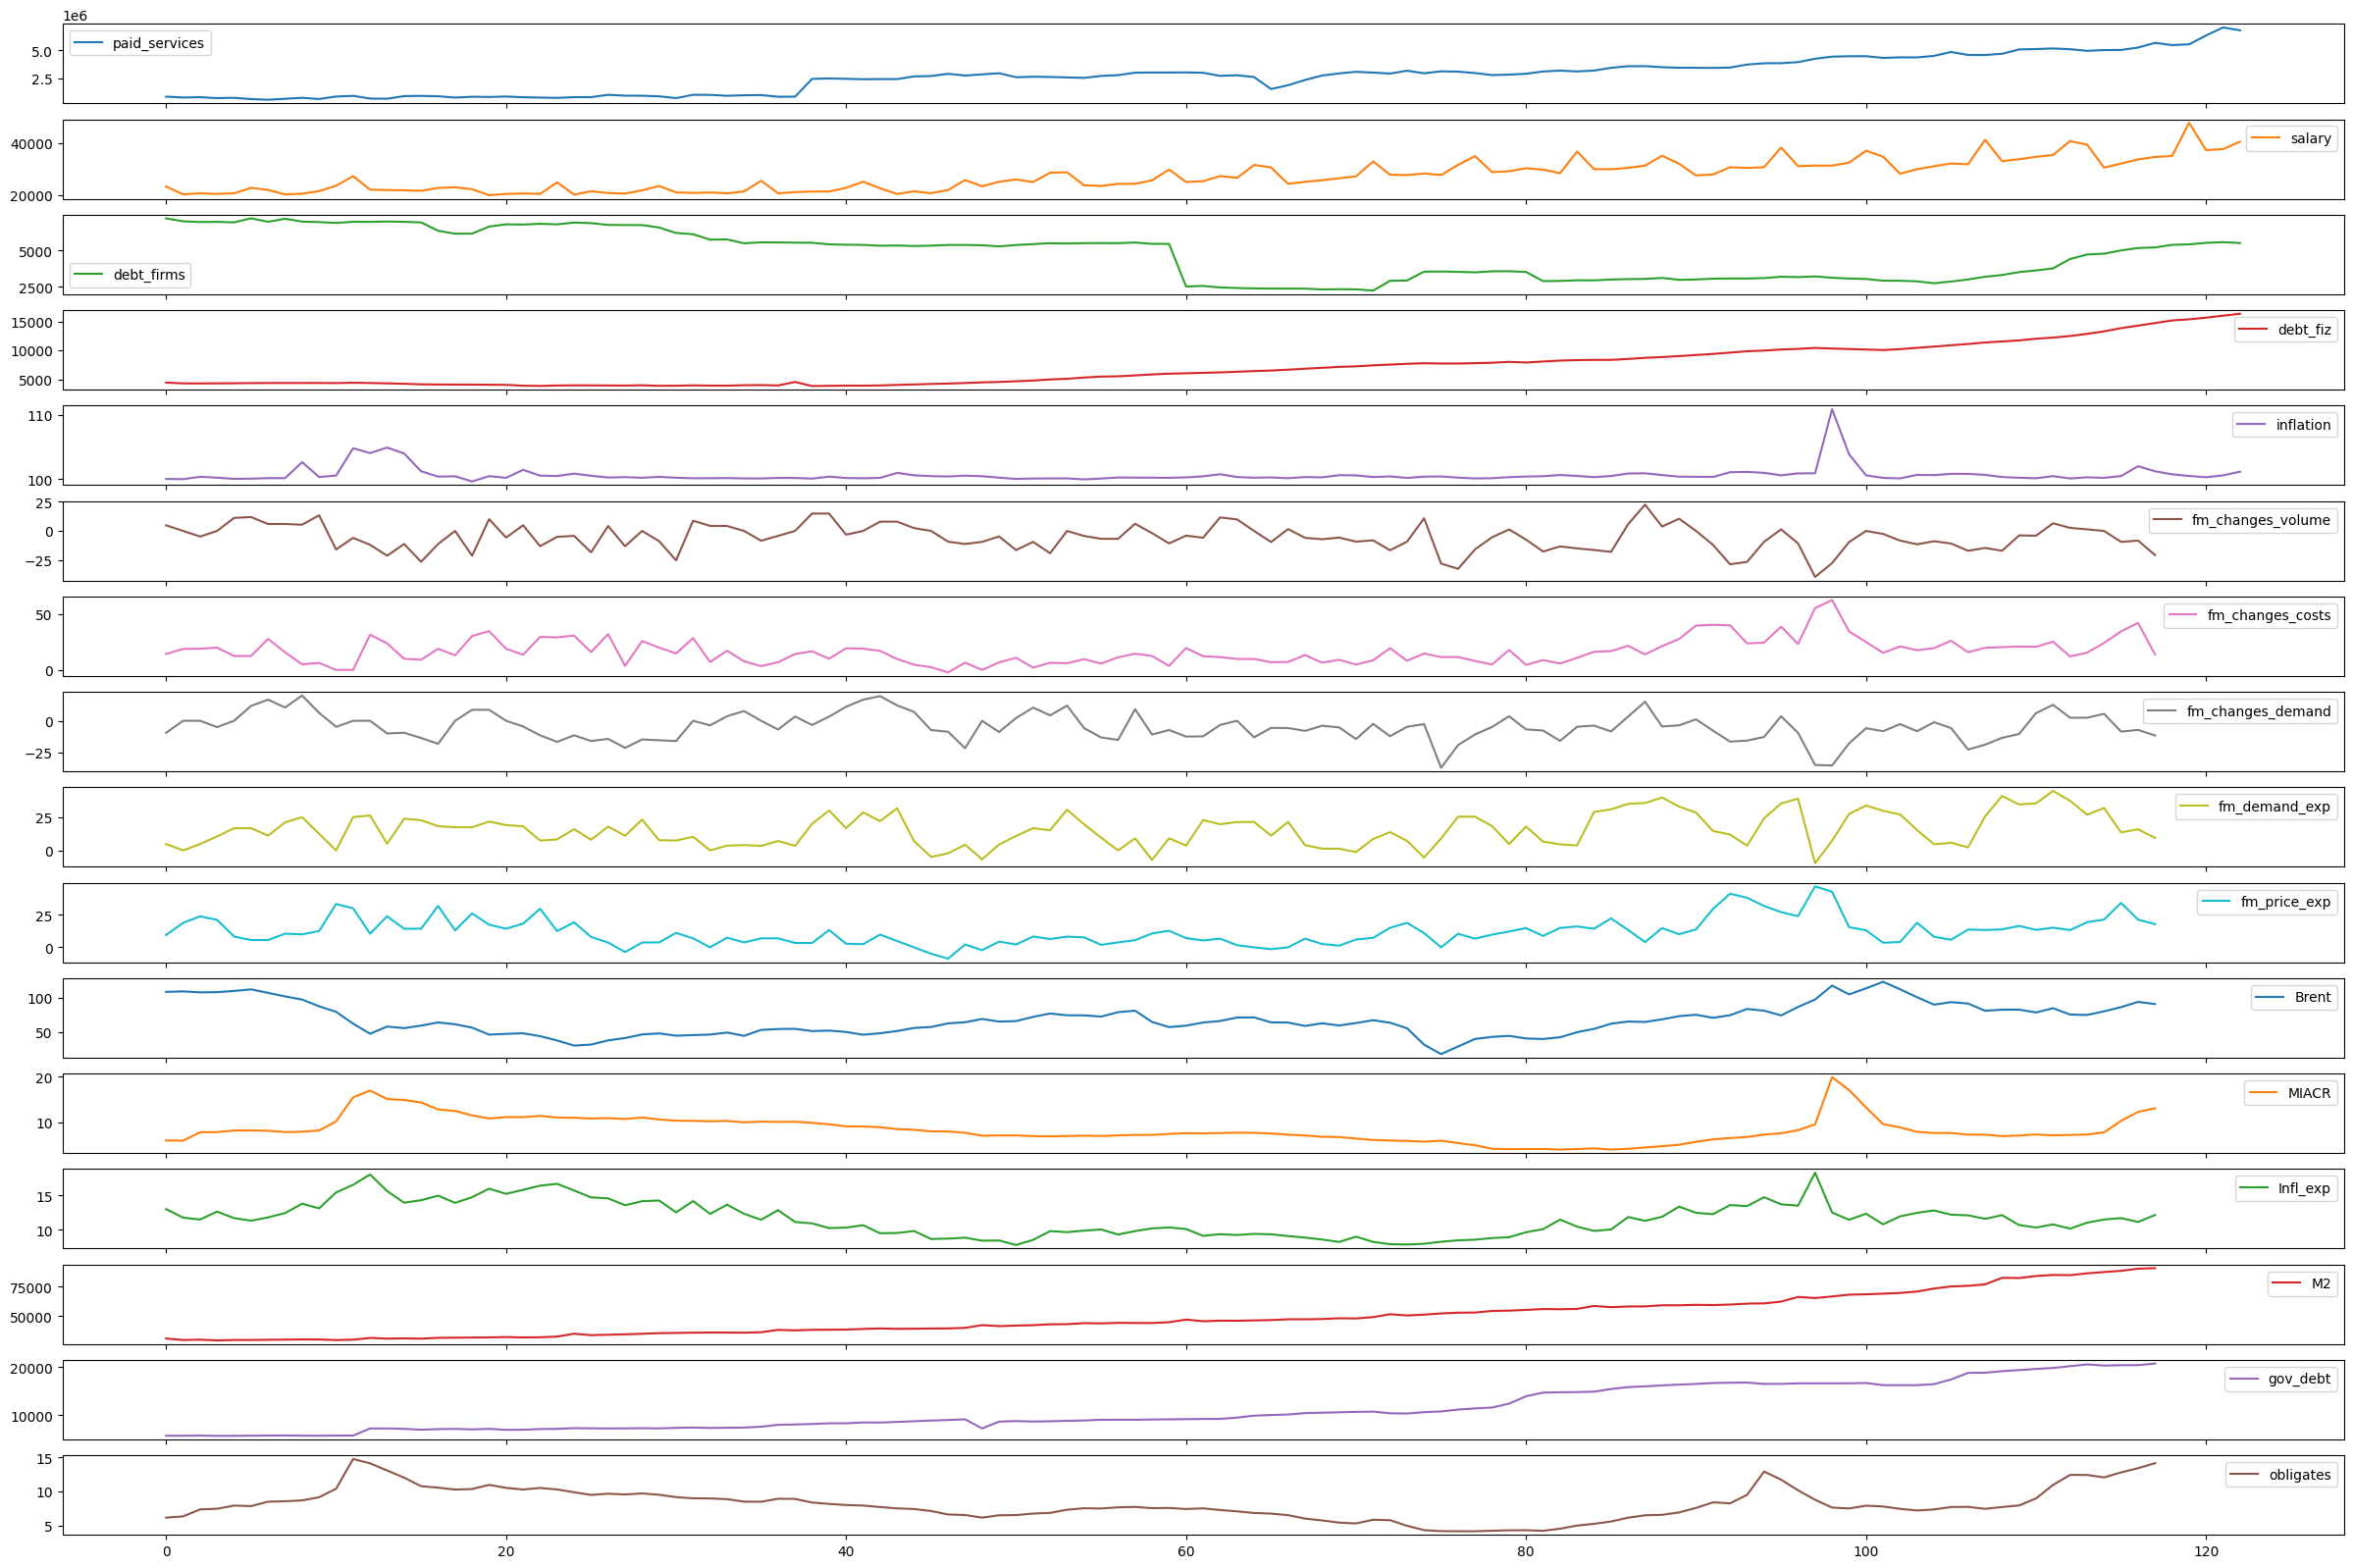

In [131]:
pd.read_csv('regional_data/infl_Республика_Ингушетия.csv').plot(subplots=True, figsize=(30, 20))